In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import datetime
import time
import math
import warnings
warnings.filterwarnings("ignore")
import glob

In [58]:
from Preprocessing import create_house_dataframe, date

house_list = [1,2,3,5]
df = create_house_dataframe(house_list)
dates = date(house_list, df)

House 1 finish:
                     mains_1  mains_2  oven_3  oven_4  refrigerator_5  \
2011-04-18 13:22:13   222.20   118.83     0.0     0.0             6.0   
2011-04-18 13:22:16   223.17   119.19     0.0     0.0             6.0   
2011-04-18 13:22:20   223.60   118.92     0.0     0.0             6.0   
2011-04-18 13:22:23   222.91   119.16     0.0     0.0             6.0   
2011-04-18 13:22:26   222.94   118.83     0.0     0.0             6.0   

                     dishwaser_6  kitchen_outlets_7  kitchen_outlets_8  \
2011-04-18 13:22:13          0.0               34.0               21.0   
2011-04-18 13:22:16          0.0               34.0               21.0   
2011-04-18 13:22:20          0.0               34.0               22.0   
2011-04-18 13:22:23          1.0               35.0               21.0   
2011-04-18 13:22:26          0.0               34.0               21.0   

                     lighting_9  washer_dryer_10  microwave_11  \
2011-04-18 13:22:13        81.0   

House 1 data contain 23 days from 2011-04-18 to 2011-05-24.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-03', '2011-05-06', '2011-05-07', '2011-05-11', '2011-05-12', '2011-05-13', '2011-05-22', '2011-05-23', '2011-05-24'] 

House 2 data contain 16 days from 2011-04-18 to 2011-05-22.
['2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-04-29', '2011-04-30', '2011-05-01', '2011-05-02', '2011-05-22'] 

House 3 data contain 26 days from 2011-04-16 to 2011-05-31.
['2011-04-16', '2011-04-17', '2011-04-18', '2011-04-19', '2011-04-20', '2011-04-21', '2011-04-22', '2011-04-23', '2011-04-24', '2011-04-25', '2011-04-26', '2011-04-27', '2011-04-28', '2011-05-17', '2011-05-18', '2011-05-19', '2011-05-21', '2011-05-22', '2011-05-23', '

In [3]:
for i in [1,2,3,5]:
    print(df[i].columns.values)

['mains_1' 'mains_2' 'oven_3' 'oven_4' 'refrigerator_5' 'dishwaser_6'
 'kitchen_outlets_7' 'kitchen_outlets_8' 'lighting_9' 'washer_dryer_10'
 'microwave_11' 'bathroom_gfi_12' 'electric_heat_13' 'stove_14'
 'kitchen_outlets_15' 'kitchen_outlets_16' 'lighting_17' 'lighting_18'
 'washer_dryer_19' 'washer_dryer_20']
['mains_1' 'mains_2' 'kitchen_outlets_3' 'lighting_4' 'stove_5'
 'microwave_6' 'washer_dryer_7' 'kitchen_outlets_8' 'refrigerator_9'
 'dishwaser_10' 'disposal_11']
['mains_1' 'mains_2' 'outlets_unknown_3' 'outlets_unknown_4' 'lighting_5'
 'electronics_6' 'refrigerator_7' 'disposal_8' 'dishwaser_9' 'furance_10'
 'lighting_11' 'outlets_unknown_12' 'washer_dryer_13' 'washer_dryer_14'
 'lighting_15' 'microwave_16' 'lighting_17' 'smoke_alarms_18'
 'lighting_19' 'bathroom_gfi_20' 'kitchen_outlets_21' 'kitchen_outlets_22']
['mains_1' 'mains_2' 'microwave_3' 'lighting_4' 'outlets_unknown_5'
 'furance_6' 'outlets_unknown_7' 'washer_dryer_8' 'washer_dryer_9'
 'subpanel_10' 'subpanel_11'

In [4]:
X1 = df[1]['mains_1'].values.astype(np.float32)
y1 = df[1]['refrigerator_5'].values.astype(np.float32)
X2 = df[2]['mains_2'].values.astype(np.float32)
y2 = df[2]['refrigerator_9'].values.astype(np.float32)
X3 = df[3]['mains_2'].values.astype(np.float32)
y3 = df[3]['refrigerator_7'].values.astype(np.float32)
X5 = df[5]['mains_2'].values.astype(np.float32)
y5 = df[5]['refrigerator_18'].values.astype(np.float32)

In [5]:
def remove_abnormal_points(y,left_threshold=200,right_threshold=80):
    y_ = []
    for i,value in enumerate(y):
      
        if i == 0 or i==len(y)-1:
            y_.append(y[i])
        else:
            if y[i]-y[i-1]>left_threshold and y[i]-y[i+1]>right_threshold:
#                        print('index:',i)
                y_.append(y[i+1]+1)
            else:
                y_.append(y[i])
    return np.array(y_)

def get_differential_sequence(X):      
    X_d = []
    pre_item = 0
    for item in X:
        X_d.append(item-pre_item)
        pre_item = item
    X_d = np.array(X_d) # shape = (samples,)
    return X_d

def get_odd_data(X_o, y_o, MAX_X, MAX_y):
    #X_o,y_o = get_house_raw_data(house, self.appliance) 
            
    X_o = remove_abnormal_points(X_o)  # 去除异常点
    X_o = X_o/MAX_X # (samples,1)
    #X_d = get_differential_sequence(X_o)  # (samples,)
    #X_dd = get_differential_sequence(X_d) # (samples,)
            
    y_o = remove_abnormal_points(y_o)  # 去除异常点
    y_o = y_o/MAX_y # (samples,1)
    #y_d = get_differential_sequence(y_o)  # (samples,)
            
    X = np.expand_dims(X_o,1)  # (samples,3)
    y = np.expand_dims(y_o,1)       # (samples,3)
            
    return X,y 

def shift_segment(X,y,seg_length,stride,print_info=True):
    '''
    X is X_o-X_d-X_dd  shape = (samples,3)
    y is y_o-y_d       shape = (samples,2)
    '''
    X_o_seg = []
    #X_d_seg = []
    #X_dd_seg = []
    y_o_seg = []
    #y_d_seg = []
      
    for i in range(len(X)-seg_length+1):
        if i%stride==0:
            assert len(X[i:i+seg_length]) == seg_length
            X_o_seg.append(  X[i:i+seg_length].reshape(-1) ) 
            #X_d_seg.append(  X[i:i+seg_length,1] )
            #X_dd_seg.append( X[i:i+seg_length,2] )

            y_o_seg.append(  y[i+seg_length//2-1,0] )
            #y_d_seg.append(  y[i+seg_length//2-1,1] )
    if print_info==True:           
        print(' '*7,'sequence length = {}'.format(len(X)))
        print(' '*7,'windows length = {}'.format(seg_length))
        print(' '*7,'stride = {}'.format(stride))
        print(' '*7,'segments =',len(y_o_seg))
    # (segments,seg_length)
    return np.array(X_o_seg), np.array(y_o_seg)#,np.array(X_d_seg), np.array(X_dd_seg)], [np.array(y_o_seg)],np.array(y_d_seg)]


In [6]:
print('-------- Load Training Data ---------')
first = True
MAX_X = 2000
MAX_y = 200
windows_length = 400
stride = 1

for X,y in [(X2, y2),(X3, y3),(X5, y5)]:
    # 提取一个房间的数据并生成三路odd数据
    X_i,y_i = get_odd_data(X, y, MAX_X, MAX_y)
    X_seg_i,y_seg_i = shift_segment(X_i,y_i,windows_length,stride)
    
    print(X_seg_i.shape, y_seg_i.shape)
    # 合并房间i的数据
    if first == True:

        X_train = X_i # shape=(samples,3)
        y_train = y_i # shape=(samples,2)
        

        # shape=(samples,seg_length)
        X_o_train_seg = X_seg_i
        y_o_train_seg = y_seg_i

        first = False
    else:
        # shape=(samples+,3)
        X_train = np.vstack((X_train,X_i))
        y_train = np.vstack((y_train,y_i))

        # shape=(samples+,seg_length)
        X_o_train_seg = np.vstack((X_o_train_seg,X_seg_i))
        y_o_train_seg = np.hstack((y_o_train_seg,y_seg_i))

-------- Load Training Data ---------
        sequence length = 316840
        windows length = 400
        stride = 1
        segments = 316441
(316441, 400) (316441,)
        sequence length = 376150
        windows length = 400
        stride = 1
        segments = 375751
(375751, 400) (375751,)
        sequence length = 77451
        windows length = 400
        stride = 1
        segments = 77052
(77052, 400) (77052,)


In [7]:
X_train_seg = X_o_train_seg
y_train_seg = y_o_train_seg

In [8]:
print('-------- Load Testing Data ---------')
X_i,y_i = get_odd_data(X1, y1, MAX_X, MAX_y)
X_seg_i,y_seg_i = shift_segment(X_i,y_i,windows_length,stride)
X_test = X_i   # shape=(samples,3)
y_test = y_i   # shape=(samples,2)
X_test_seg = X_seg_i 
y_test_seg = y_seg_i

-------- Load Testing Data ---------
        sequence length = 406748
        windows length = 400
        stride = 1
        segments = 406349


In [9]:
print('\nX_train.shape = {}'.format(X_train.shape))
print('y_train.shape = {}'.format(y_train.shape))

print('X_o_train_seg.shape = {}'.format(X_train_seg.shape))
print('y_o_train_seg.shape = {}'.format(y_train_seg.shape))

print('\nX_test.shape = {}'.format(X_test.shape))
print('y_test.shape = {}'.format(y_test.shape))

print('X_o_test_seg.shape = {}'.format(X_test_seg.shape))
print('y_o_test_seg.shape = {}'.format(y_test_seg.shape))


X_train.shape = (770441, 1)
y_train.shape = (770441, 1)
X_o_train_seg.shape = (769244, 400)
y_o_train_seg.shape = (769244,)

X_test.shape = (406748, 1)
y_test.shape = (406748, 1)
X_o_test_seg.shape = (406349, 400)
y_o_test_seg.shape = (406349,)


In [10]:
X_train_seg = np.expand_dims(X_train_seg,axis=2) 
X_test_seg = np.expand_dims(X_test_seg,axis=2) 

print('X_o_train_seg.shape = {}'.format(X_train_seg.shape))
print('y_o_train_seg.shape = {}'.format(y_train_seg.shape))

print('X_o_test_seg.shape = {}'.format(X_test_seg.shape))
print('y_o_test_seg.shape = {}'.format(y_test_seg.shape))

X_o_train_seg.shape = (769244, 400, 1)
y_o_train_seg.shape = (769244,)
X_o_test_seg.shape = (406349, 400, 1)
y_o_test_seg.shape = (406349,)


# CONV1D

In [11]:
from Metrics import *
from keras.models import load_model
model_CONV1D = load_model("CNN(Chaoyun).h5")
pred= model_CONV1D.predict(X_test_seg)

mse_loss_norm = mse_loss(pred.reshape(-1)*MAX_y, y_test_seg*MAX_y)
mae_loss_norm = mae_loss(pred.reshape(-1)*MAX_y, y_test_seg*MAX_y)
print('Mean square error on test set: ', mse_loss_norm)
print('Mean absolute error on the test set: ', mae_loss_norm)

rpaf = recall_precision_accuracy_f1(pred.reshape(-1)*MAX_y, y_test_seg*MAX_y, 50)
rete = relative_error_total_energy(pred.reshape(-1)*MAX_y, y_test_seg*MAX_y)
mae = mean_absolute_error(pred.reshape(-1)*MAX_y, y_test_seg*MAX_y)

print("============ Recall: {}".format(rpaf[0]))
print("============ Precision: {}".format(rpaf[1]))
print("============ Accuracy: {}".format(rpaf[2]))
print("============ F1 Score: {}".format(rpaf[3]))

print("============ Relative error in total energy: {}".format(rete))
print("============ Mean absolute error(in Watts): {}".format(mae))

Using TensorFlow backend.


Mean square error on test set:  1722.3230188146842
Mean absolute error on the test set:  21.045197201476174
============ Recall: 0.9549688072316296
============ Precision: 0.8279683108458084
============ Accuracy: 0.9388259845600703
============ F1 Score: 0.8869453692080991
============ Relative error in total energy: 0.17039106717732652
============ Mean absolute error(in Watts): 21.045197201476174


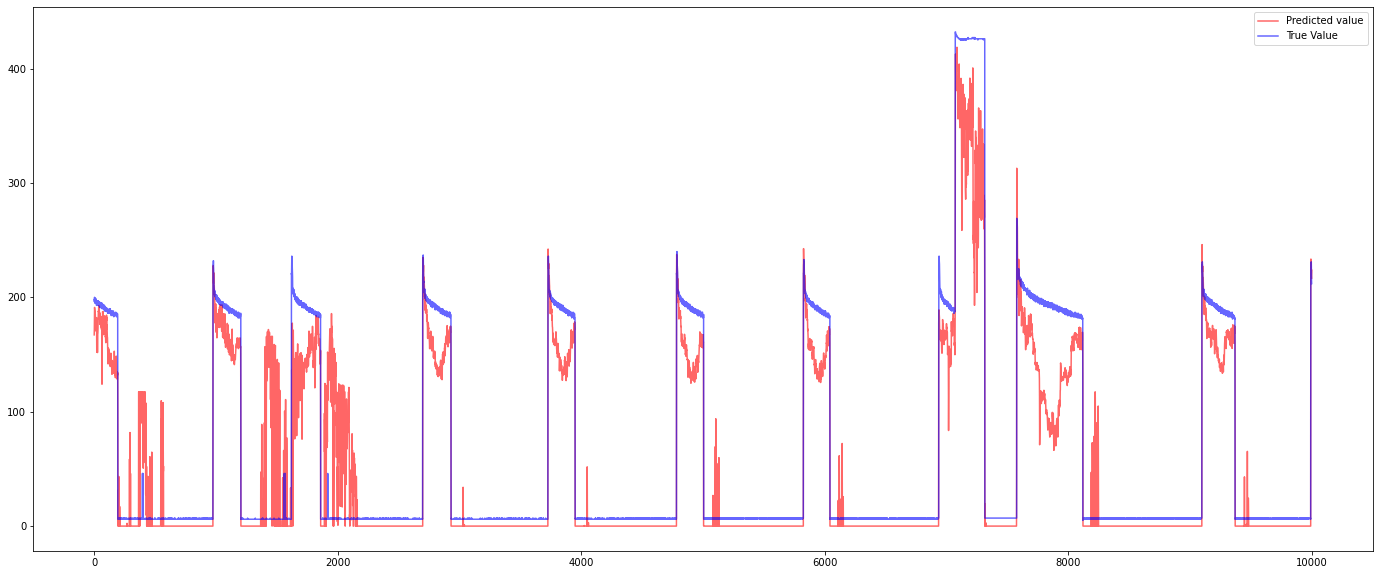

In [17]:
plt.rcParams["figure.figsize"] = [24,10]
plt.plot((pred.reshape(-1)*MAX_y)[30000:40000], color = 'red', alpha = 0.6, label = 'Predicted value')
plt.plot((y_test_seg*MAX_y)[30000:40000], color = 'blue', alpha = 0.6, label = 'True Value')
plt.legend()

plt.savefig('CONV1D.png')

# DAE

In [19]:
def truncate(X_train1, y_train1, window_size):
    size = X_train1.shape[0]
    index = 1
    while (size-index)%(window_size*2) != 0:
        size -= index
        #print(size)
    return X_train1[:size-1,:], y_train1[:size-1,:]
    
X_train_tru, y_train_tru = truncate(X_train, y_train, 256)
X_test_tru, y_test_tru = truncate(X_test, y_test, 256)
print(X_train_tru.shape, y_train_tru.shape, X_test_tru.shape, y_test_tru.shape)

s = 256
X_auto_train = np.reshape(X_train_tru, (int(len(X_train_tru) / s), s, 1))
y_auto_train = np.reshape(y_train_tru, (int(len(y_train_tru) / s), s, 1))
X_auto_test = np.reshape(X_test_tru, (int(len(X_test_tru) / s), s, 1))
y_auto_test = np.reshape(y_test_tru, (int(len( y_test_tru) / s), s, 1))

print(X_auto_train.shape, y_auto_train.shape, X_auto_test.shape, y_auto_test.shape)

(770048, 1) (770048, 1) (406528, 1) (406528, 1)
(3008, 256, 1) (3008, 256, 1) (1588, 256, 1) (1588, 256, 1)


In [20]:
model_DAE = load_model("DAE_256_l1_4_200epoch.h5")

pred_DAE= model_DAE.predict(X_auto_test)

mse_loss_norm = mse_loss(pred_DAE.reshape(-1)*MAX_y, y_auto_test.reshape(-1)*MAX_y)
mae_loss_norm = mae_loss(pred_DAE.reshape(-1)*MAX_y, y_auto_test.reshape(-1)*MAX_y)
print('Mean square error on test set: ', mse_loss_norm)
print('Mean absolute error on the test set: ', mae_loss_norm)

rpaf = recall_precision_accuracy_f1(pred_DAE.reshape(-1)*MAX_y, y_auto_test.reshape(-1)*MAX_y, 50)
rete = relative_error_total_energy(pred_DAE.reshape(-1)*MAX_y, y_auto_test.reshape(-1)*MAX_y)
mae = mean_absolute_error(pred_DAE.reshape(-1)*MAX_y, y_auto_test.reshape(-1)*MAX_y)

print("============ Recall: {}".format(rpaf[0]))
print("============ Precision: {}".format(rpaf[1]))
print("============ Accuracy: {}".format(rpaf[2]))
print("============ F1 Score: {}".format(rpaf[3]))


print("============ Relative error in total energy: {}".format(rete))
print("============ Mean absolute error(in Watts): {}".format(mae))

Mean square error on test set:  2940.302252006304
Mean absolute error on the test set:  30.063416386739984
============ Recall: 0.9136885815859833
============ Precision: 0.756531893154284
============ Accuracy: 0.9044666050062973
============ F1 Score: 0.8277165354330708
============ Relative error in total energy: 0.1400710094306936
============ Mean absolute error(in Watts): 30.063416386739984


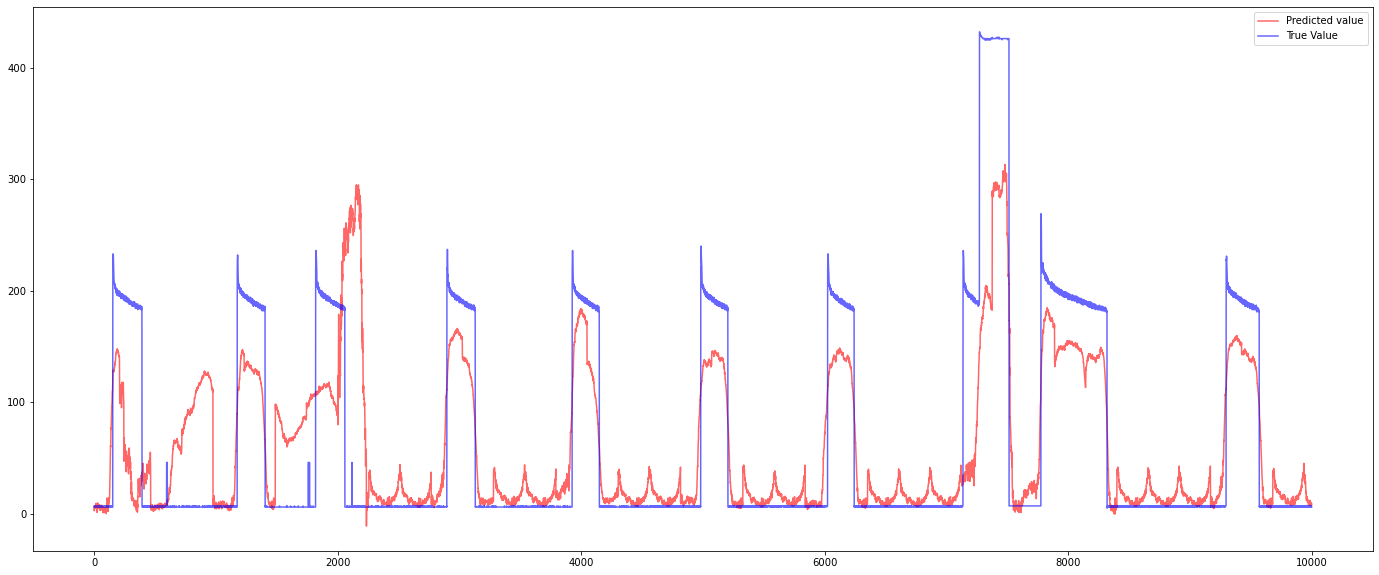

In [22]:
plt.rcParams["figure.figsize"] = [24,10]
plt.plot((pred_DAE.reshape(-1)*MAX_y)[30000:40000], color = 'red', alpha = 0.6, label = 'Predicted value')
plt.plot(( y_auto_test.reshape(-1)*MAX_y)[30000:40000], color = 'blue', alpha = 0.6, label = 'True Value')
plt.legend()
plt.savefig('DAE.png')

# FHMM and CO

Joint Testing for all algorithms
Loading data for  REDD  dataset
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Creating an Artificial Aggregate
Generating predictions for : FHMM
Generating predictions for : CO
...............CO disaggregate_chunk running.............
............  mae  .............. washer'
             FHMM_EXACT         CO
fridge        25.651194  31.391991
microwave     39.019516  28.519199
dish washer   23.590155  16.528391
............  rmse  ..............
             FHMM_EXACT          CO
fridge        55.818464   69.495967
microwave    151.304503  120.898278
dish washer  106.509495   89.428865
............  recall_precision_accuracy_f1  ..............
                                                    FHMM_EXACT  \
fridge       (0.9487836683304105, 0.8910028292506901, 0.960...   
microwave    (0.8642174673664379, 0.049219025429574334, 0.7...   
dish washer

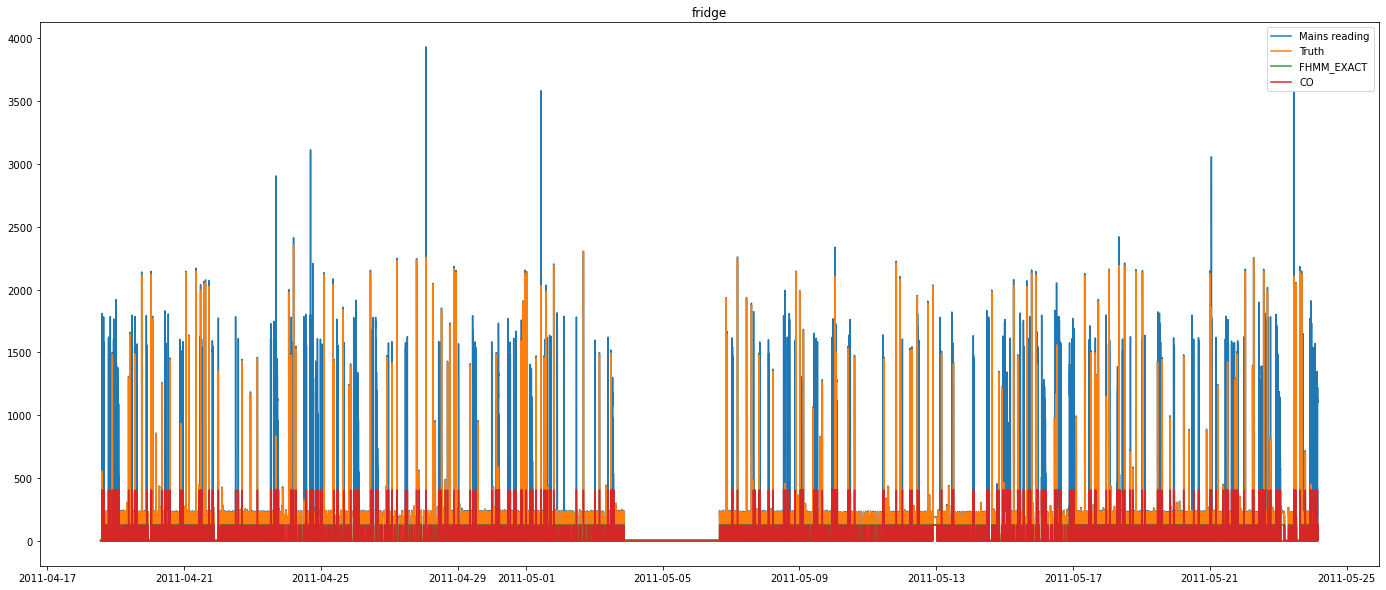

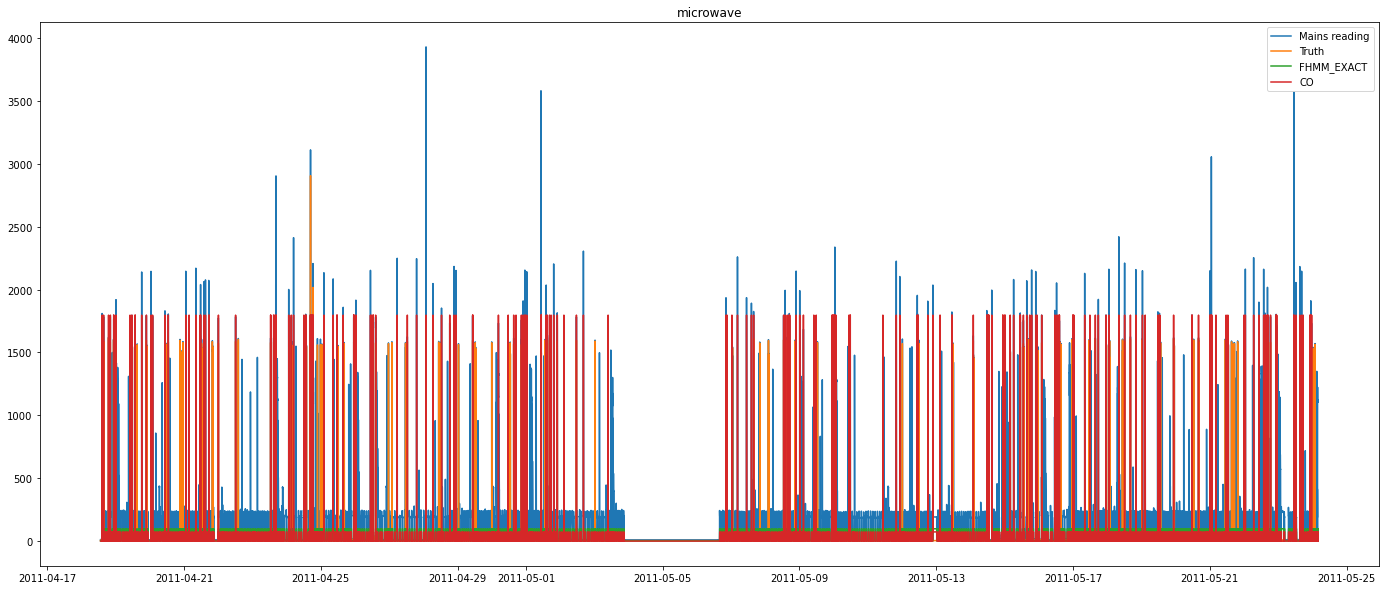

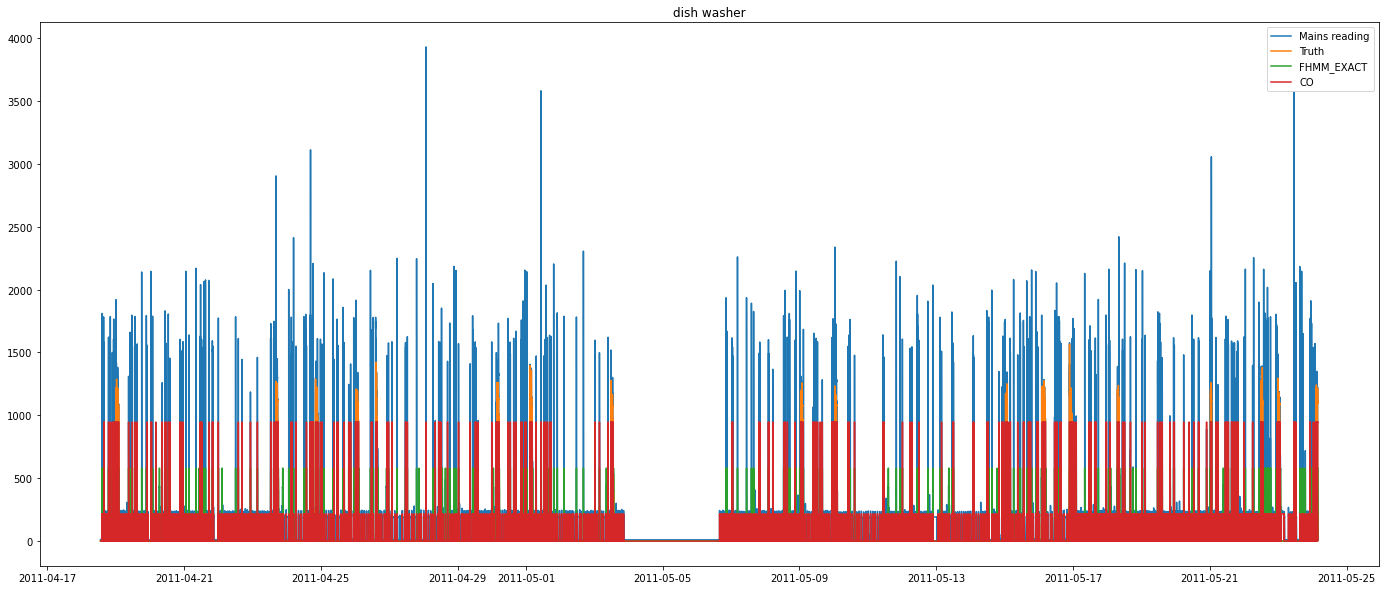

In [23]:
from nilmtk.disaggregate.fhmm_exact import FHMMExact
from nilmtk.disaggregate import CO
from nilmtk.api import API
import warnings
warnings.filterwarnings("ignore")

experiment1 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 3,
  'appliances': ['fridge','microwave','dish washer'],
  'artificial_aggregate': True,
  'chunksize': 20000,
  'DROP_ALL_NANS': False,
  'methods': {"FHMM_EXACT":FHMMExact({'num_of_states':2}),"CO":CO({})},   
  'train': {
    'datasets': {
      'REDD': {
        'path': 'C:/Users/admin/Desktop/REDD_dataset/low_freq/redd.h5',
        'buildings': {
              2: {'start_time': '2011-04-18',
                    'end_time': '2011-05-22'
              },
            3:{'start_time': '2011-04-16',
                    'end_time': '2011-05-31'},
            5:{'start_time': '2011-04-18',
                    'end_time': '2011-06-01'}
            }
          },        
        }
      },    
  'test': {
    'datasets': {
      'REDD': {
        'path': 'C:/Users/admin/Desktop/REDD_dataset/low_freq/redd.h5',
        'buildings': {
              1: {'start_time': '2011-04-18',
                    'end_time': '2011-05-24'
          }
        }
      },
    },
        'metrics':['mae', 'rmse','recall_precision_accuracy_f1','relative_error_total_energy']
    }
}

api_results_experiment_1 = API(experiment1)

Joint Testing for all algorithms
Loading data for  REDD  dataset
Loading data for meter ElecMeterID(instance=2, building=1, dataset='REDD')     
Done loading data all meters for this chunk.
Dropping missing values
Creating an Artificial Aggregate
Generating predictions for : FHMM
............  back  ..............
        FHMM_EXACT
fridge           1


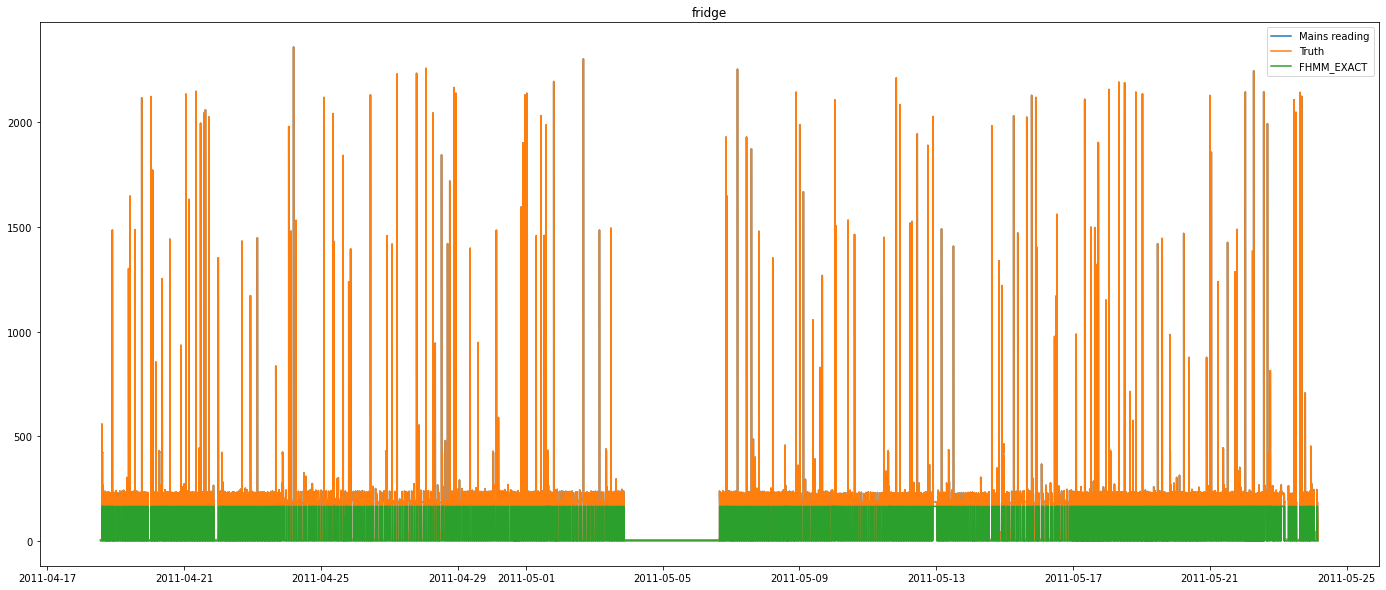

In [45]:
experiment3 = {
  'power': {'mains': ['apparent','active'],'appliance': ['apparent','active']},
  'sample_rate': 3,
  'appliances': ['fridge'],
  'artificial_aggregate': True,
  'chunksize': 20000,
  'DROP_ALL_NANS': False,
  'methods': {"FHMM_EXACT":FHMMExact({'num_of_states':3})},   
  'train': {
    'datasets': {
      'REDD': {
        'path': 'C:/Users/admin/Desktop/REDD_dataset/low_freq/redd.h5',
        'buildings': {
              2: {'start_time': '2011-04-18',
                    'end_time': '2011-05-22'
              },
            3:{'start_time': '2011-04-16',
                    'end_time': '2011-05-31'},
            5:{'start_time': '2011-04-18',
                    'end_time': '2011-06-01'}
            }
          },        
        }
      },    
  'test': {
    'datasets': {
      'REDD': {
        'path': 'C:/Users/admin/Desktop/REDD_dataset/low_freq/redd.h5',
        'buildings': {
              1: {'start_time': '2011-04-18',
                    'end_time': '2011-05-24'
          }
        }
      },
    },
        'metrics':['back']
    }
}

api_results_experiment_1 = API(experiment3)

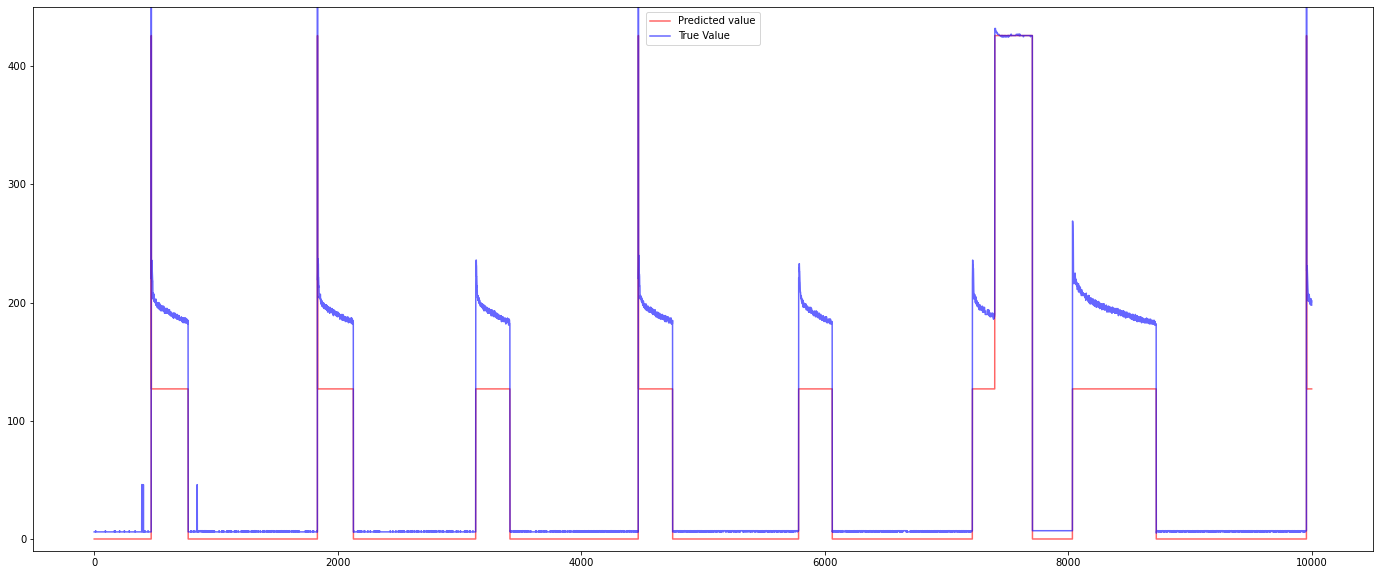

In [42]:
import pickle

pickle_in = open(r'F:\Final_Project\FHMM\app_gt_fri.pickle','rb')
gt_frig = pickle.load(pickle_in)
pickle_in = open(r'F:\Final_Project\FHMM\app_pred_fri.pickle','rb')
pred_fri = pickle.load(pickle_in)

plt.rcParams["figure.figsize"] = [24,10]
plt.plot((pred_fri.reshape(-1))[42000:52000], color = 'red', alpha = 0.6, label = 'Predicted value')
plt.plot(( gt_frig.reshape(-1))[42000:52000], color = 'blue', alpha = 0.6, label = 'True Value')
plt.ylim((-10,450))
plt.legend()
plt.savefig('CO.png')

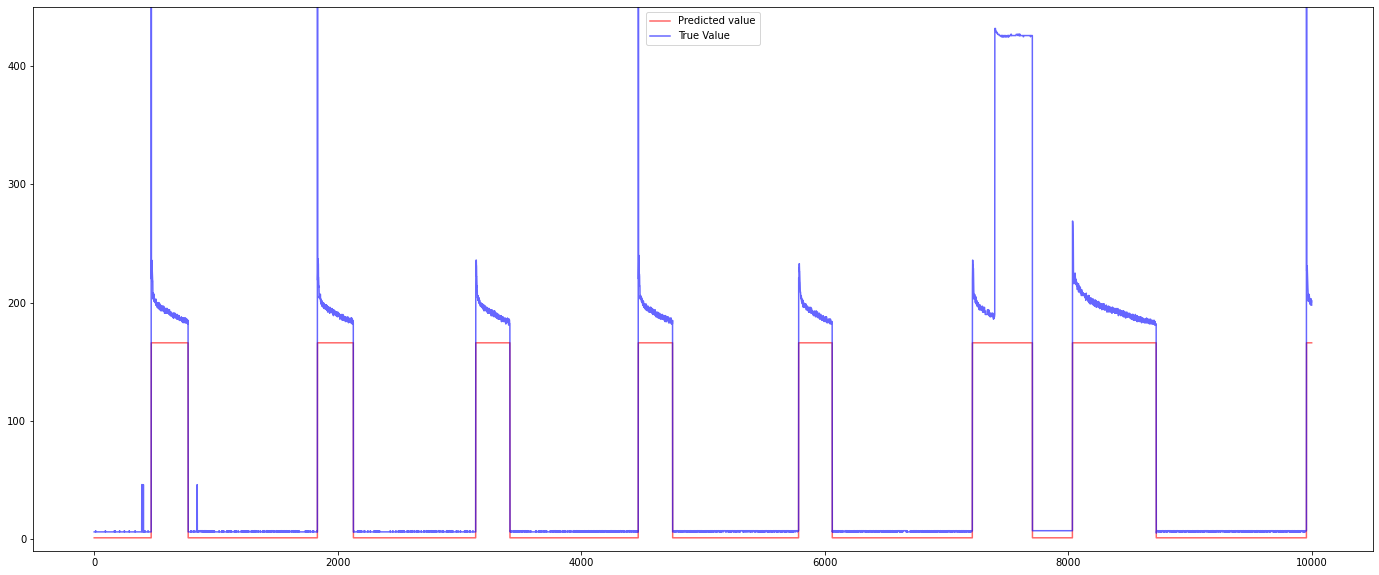

In [47]:
import pickle

pickle_in = open(r'F:\Final_Project\FHMM\app_gt_fri.pickle','rb')
gt_frig = pickle.load(pickle_in)
pickle_in = open(r'F:\Final_Project\FHMM\app_pred_fri.pickle','rb')
pred_fri = pickle.load(pickle_in)

plt.rcParams["figure.figsize"] = [24,10]
plt.plot((pred_fri.reshape(-1))[42000:52000], color = 'red', alpha = 0.6, label = 'Predicted value')
plt.plot(( gt_frig.reshape(-1))[42000:52000], color = 'blue', alpha = 0.6, label = 'True Value')
plt.ylim((-10,450))
plt.legend()
#plt.savefig('FHMM.png')

# SVM

In [11]:
X_train.shape

(770441, 1)

In [12]:
X_train

array([[0.011305],
       [0.011305],
       [0.011305],
       ...,
       [0.018695],
       [0.018605],
       [0.01855 ]])

In [24]:
X_1 = np.expand_dims(df[1]['mains_2'].values.astype(np.float32), 1)
X_2 = np.expand_dims(df[2]['mains_1'].values.astype(np.float32), 1)
X_3 = np.expand_dims(df[3]['mains_1'].values.astype(np.float32), 1)
X_5 = np.expand_dims(df[5]['mains_1'].values.astype(np.float32), 1)
X = np.vstack((X_2,X_3,X_5))

X_train_12 =  np.hstack((X_train, X))
X_test_12 = np.hstack((X_test, X_1))

In [27]:
print(X_train_12.shape, X_test_12.shape, y_train.shape, y_test.shape)

(770441, 2) (406748, 2) (770441, 1) (406748, 1)


In [32]:
X_train_d = get_differential_sequence(X_train)
X_test_d = get_differential_sequence(X_test) 
X_train_123 = np.hstack((X_train_12, X_train_d))
X_test_123 = np.hstack((X_test_12, X_test_d))

print(X_train_123.shape, X_test_123.shape, y_train.shape, y_test.shape)

(770441, 3) (406748, 3) (770441, 1) (406748, 1)


In [35]:
X_train_123

array([[ 1.13050003e-02,  1.57100000e+01,  1.13050003e-02],
       [ 1.13050003e-02,  1.57100000e+01,  0.00000000e+00],
       [ 1.13050003e-02,  1.57200003e+01,  0.00000000e+00],
       ...,
       [ 1.86949997e-02,  1.51679993e+02, -1.00002289e-05],
       [ 1.86049995e-02,  1.50419998e+02, -9.00001526e-05],
       [ 1.85499992e-02,  1.49289993e+02, -5.50003052e-05]])

In [49]:
from sklearn import svm
import time
import warnings
from Metrics import *
warnings.filterwarnings('ignore')

start = time.time()
model = svm.SVR(C = 1000, gamma = 0.0001) 
model.fit(X_train_123[:30000,:], y_train[:30000])
print('Trainning time: ', time.time() - start)
y_predict = model.predict(X_test_123[30000:40000])
y_predict = np.arrary[y for y in y_predict if y > 0 else 0]
rpaf = recall_precision_accuracy_f1(y_predict.reshape(-1)*MAX_y, y_test[30000:40000].reshape(-1)*MAX_y, 50)
rete = relative_error_total_energy(y_predict.reshape(-1)*MAX_y, y_test[30000:40000].reshape(-1)*MAX_y)
mae = mean_absolute_error(y_predict.reshape(-1)*MAX_y, y_test[30000:40000].reshape(-1)*MAX_y)

print("============ Recall: {}".format(rpaf[0]))
print("============ Precision: {}".format(rpaf[1]))
print("============ Accuracy: {}".format(rpaf[2]))
print("============ F1 Score: {}".format(rpaf[3]))

print("============ Relative error in total energy: {}".format(rete))
print("============ Mean absolute error(in Watts): {}".format(mae))

Trainning time:  78.8890471458435
============ Recall: 0.9006788138620936
============ Precision: 0.7401644157369348
============ Accuracy: 0.8837
============ F1 Score: 0.8125705076551168
============ Relative error in total energy: 0.2923909599448587
============ Mean absolute error(in Watts): 71.40402062244596


In [54]:
y_predict = np.array([y if y > 0 else 0 for y in y_predict])
rpaf = recall_precision_accuracy_f1(y_predict.reshape(-1)*MAX_y, y_test[30000:40000].reshape(-1)*MAX_y, 50)
rete = relative_error_total_energy(y_predict.reshape(-1)*MAX_y, y_test[30000:40000].reshape(-1)*MAX_y)
mae = mean_absolute_error(y_predict.reshape(-1)*MAX_y, y_test[30000:40000].reshape(-1)*MAX_y)

print("============ Recall: {}".format(rpaf[0]))
print("============ Precision: {}".format(rpaf[1]))
print("============ Accuracy: {}".format(rpaf[2]))
print("============ F1 Score: {}".format(rpaf[3]))

print("============ Relative error in total energy: {}".format(rete))
print("============ Mean absolute error(in Watts): {}".format(mae))

============ Recall: 0.9006788138620936
============ Precision: 0.7401644157369348
============ Accuracy: 0.8837
============ F1 Score: 0.8125705076551168
============ Relative error in total energy: 0.21885159317530772
============ Mean absolute error(in Watts): 66.66592334510386


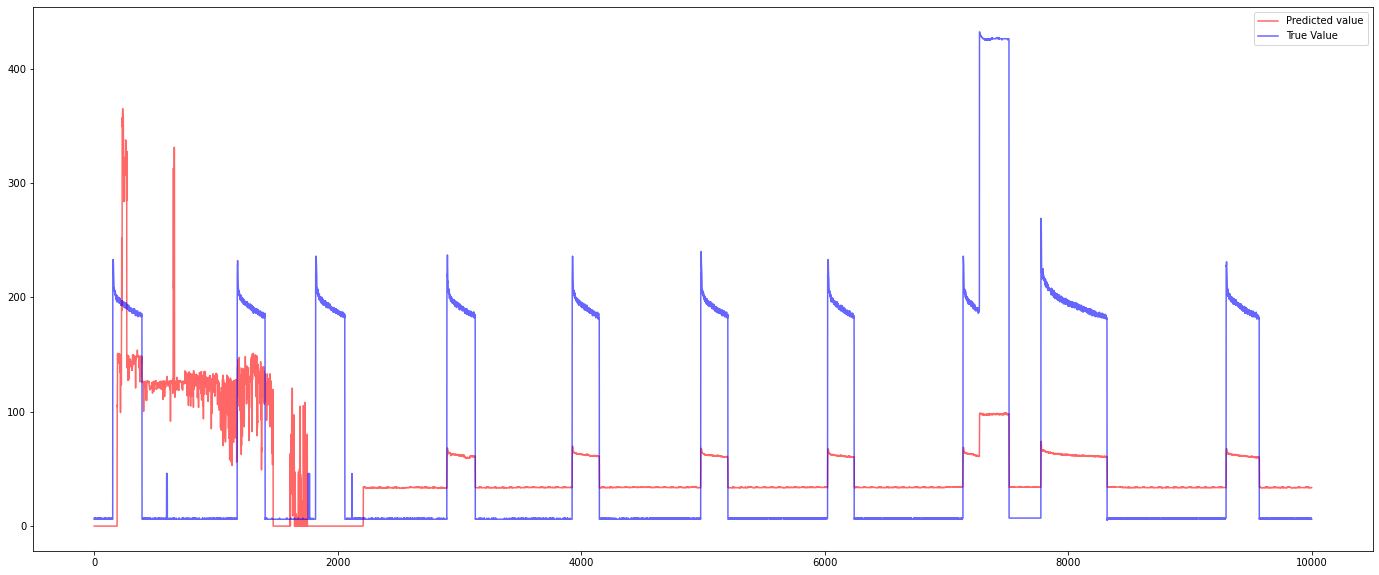

In [55]:
plt.rcParams["figure.figsize"] = [24,10]
plt.plot((y_predict.reshape(-1)*MAX_y), color = 'red', alpha = 0.6, label = 'Predicted value')
plt.plot(( y_test[30000:40000].reshape(-1)*MAX_y), color = 'blue', alpha = 0.6, label = 'True Value')
plt.legend()
plt.savefig('SVM(mutiple_house).png')

In [44]:
plt.savefig('SVM.png')

<Figure size 1728x720 with 0 Axes>

# Decisoin Tree

In [46]:
from sklearn.tree import DecisionTreeRegressor

start = time.time()

clf = DecisionTreeRegressor(min_samples_split = 300)
clf.fit(X_train_123, y_train)
y_predict_TREE = clf.predict(X_test_123)

print('Trainning time: ', time.time() - start)
 
rpaf = recall_precision_accuracy_f1(y_predict_TREE.reshape(-1)*MAX_y, y_test.reshape(-1)*MAX_y, 50)
rete = relative_error_total_energy(y_predict_TREE.reshape(-1)*MAX_y, y_test.reshape(-1)*MAX_y)
mae = mean_absolute_error(y_predict_TREE.reshape(-1)*MAX_y, y_test.reshape(-1)*MAX_y)

print("============ Recall: {}".format(rpaf[0]))
print("============ Precision: {}".format(rpaf[1]))
print("============ Accuracy: {}".format(rpaf[2]))
print("============ F1 Score: {}".format(rpaf[3]))

print("============ Relative error in total energy: {}".format(rete))
print("============ Mean absolute error(in Watts): {}".format(mae))

Trainning time:  4.662744998931885
============ Recall: 0.6754231484199198
============ Precision: 0.5688822598721076
============ Accuracy: 0.7898158073303372
============ F1 Score: 0.6175915406017123
============ Relative error in total energy: 0.14453507309268543
============ Mean absolute error(in Watts): 40.94899890106802


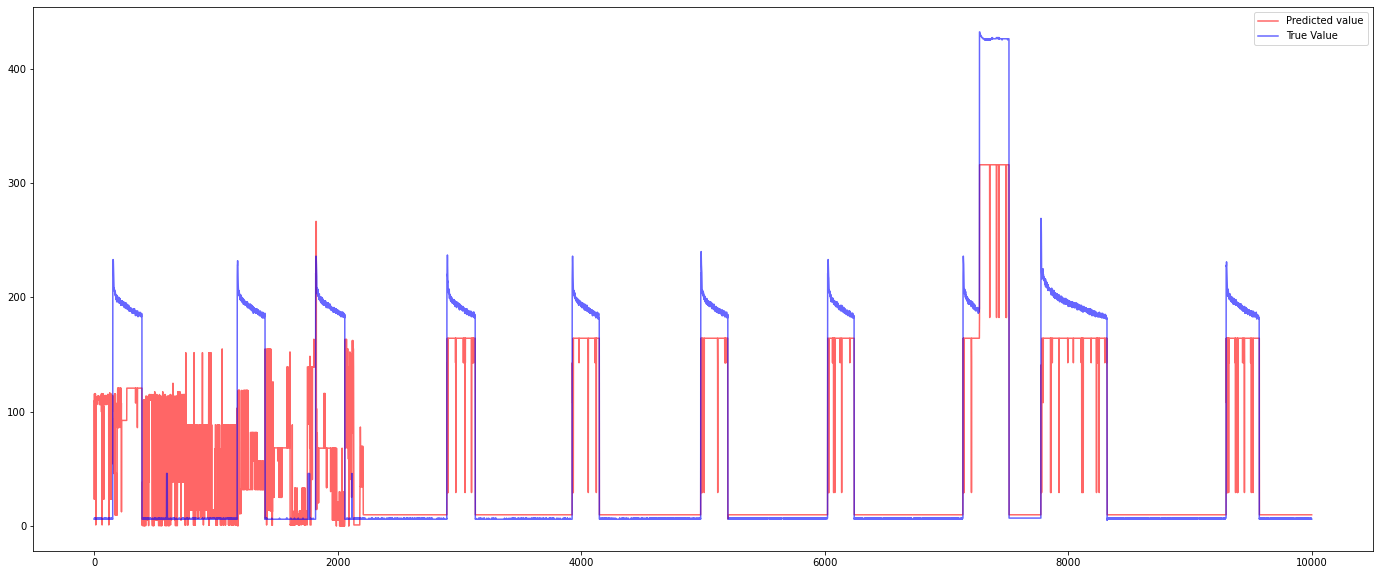

In [57]:
plt.rcParams["figure.figsize"] = [24,10]
plt.plot((y_predict_TREE[30000:40000].reshape(-1)*MAX_y), color = 'red', alpha = 0.6, label = 'Predicted value')
plt.plot(( y_test[30000:40000].reshape(-1)*MAX_y), color = 'blue', alpha = 0.6, label = 'True Value')
plt.legend()
plt.savefig('TREE.png')